# TP2 : Statististiques élémentaires, loi des grands nombres et intervalles de confiance

Dans ce second TP, on va s'intéresser plus en détail à des résultats classiques de statistiques, notamment en ce qui concerne l'approximation de l'espérance d'une variable aléatoire.

Commençons par charger les bibliothèques standard dont nous aurons besoin.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## 1. Lecture graphique des quantiles sur la fonction de répartition théorique

La fonction de répartition théorique d'une variable aléatoire $X$ est la fonction de $\mathbb{R}$ dans $[0, 1]$ définie par, 
$$
F_X(t) \ = \ \mathbb{P}(X \leq t), \qquad \forall t \in \mathbb{R}. 
$$
Le code suivant affiche la fonction de répartition théorique d'une loi Binomiale.

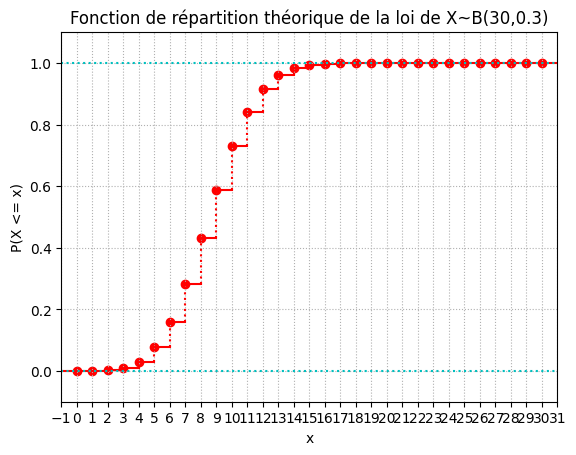

In [2]:
from math import comb
# comb(n,k) retourne le coefficient binômial « k parmi n ».

def binom(n,p,k):
    if k <= n and k >= 0 :
        return comb(n,k)*p**k*(1-p)**(n-k)
    else:
        return 0

n=30
p=.3

X = np.arange(n+1)
P = [binom(n,p,k) for k in X]

X = range(-1,n+2)
Y = [0]

# On crée les probabilités cumulées en sommant sur la distribution P déjà calculée.
for x in P:
    Y.append(Y[-1]+x)


plt.xticks(X)
plt.grid(linestyle='dotted')

# On affiche itérativement les segments.

plt.plot((X[0],X[1]),(Y[0],Y[0]),color='r')

for i in range(1,n+2):
    plt.plot((X[i],X[i]),(Y[i-1],Y[i]),color='r',linestyle='dotted')
    plt.scatter([X[i]],[Y[i]],marker='o',color='r')
    plt.plot((X[i],X[i+1]),(Y[i],Y[i]),color='r')

plt.xlim(-1,n+1)
plt.ylim(-0.1,1.1)

plt.plot([-1,n+1],[0,0],color='c',linestyle='dotted')
plt.plot([-1,n+1],[1,1],color='c',linestyle='dotted')

plt.xlabel('x')
plt.ylabel('P(X <= x)')
plt.title('Fonction de répartition théorique de la loi de X~B('+str(n)+','+str(p)+')')

# Code à compléter

plt.show()

On se propose désormais de compléter le code pour afficher les droites horizontales correspondants au premier quartile, au troisième quartile et à la médiane. Comment lit-on graphiquement ces données ?

<details>
<summary><b>Cliquer ici pour afficher la réponse.</b></summary>

Il suffit de regarder où les droites horizontales traverse la fonction de répartition. Si cette droite traverse un saut de la fonction (en pointillés rouge dans la correction indicative), on considère que l'intersection a lieu à cette position.
En revanche, si notre droite tombe pile sur une partie constante de la fonction, il n'y a pas façon uniquement déterminée de choisir le quantile, et on peut arrondir à droite, à gauche ou faire une moyenne.
On fera ici le choix de convention de l'arrondi à gauche.
</details>

In [3]:
# À vous de jouer !

In [4]:
# Solution :

## 2. Étude de la loi binomiale et diagrammes en boîte à moustache

On va premièrement utiliser le module `numpy` pour étudier quelques propriétés empirique d'un échantillon aléatoire.

**Exercice 1 :**

1. Créer un échantillon de taille `n=10` d'une loi binomiale $\mathcal{B}(30,0.3)$ dans le bloc 1.
2. Calculer sa moyenne (empirique) `m1` (avec la fonction `np.average`) et son écart-type (empirique) `s1` (avec `np.std`) dans le bloc 2.
4. Calculer la liste des quartiles `Q1` (avec la fonction `np.quantile`).
5. Répéter les questions précédentes dans le bloc 3, avec un échantillon de taille $100$ (dans des variables `m2`, `s2` et `Q2`), puis $1000$ (dans des variables `m3`, `s3` et `Q3`).
6. Comparer les résultats avec la valeur théorique attendue dans le bloc 4.

In [5]:
### BLOC 1 ###

n1 = 10

def echantillon(n):
    L=[]
    # Code à compléter
    return L

L1 = echantillon(n)

In [6]:
### BLOC 2 ###

m1 = None
s1 = None
Q1 = None

print(m1,s1,Q1)

None None None


In [7]:
### BLOC 3 ###

n2 = 100
L2 = echantillon(n2)

m2 = None
s2 = None
Q2 = None

n3 = 10000
L3 = echantillon(n3)

m3 = None
s3 = None
Q3 = None

In [8]:
### BLOC 4 ###

Les diagrammes en boîte à moustaches (*box plot* en anglais) permettent, dans une certaine mesure, de représenter graphiquement les quantiles d'une distribution.
On peut afficher un boxplot via la fonction `plt.boxplot(L,labels=[mot])`, où `L` est un échantillon aléatoire, et `mot` le mot (optionnel) correspondant sur l'axe horizontal. Si on veut juxtaposer plusieurs boîtes, on remplacera `L` par une *liste* d'échantillons (donc une *liste de listes*), et on affectera une liste de mots à `label`.

**Exercice 2 :**

1. Afficher le boxplot correspondant aux échantillons `L1`, `L2` et `L3` précédemment générés.
2. Afficher les droites horizontales correspondant aux valeurs théoriques des quantiles observées dans la première partie.

In [9]:
# À vous de jouer !

In [10]:
# Solution

La boite centrale correspondant à un échantillon représente les quartiles empiriques, avec la médiane au milieu.
Ainsi, on constate que lorsque la taille de l'échantillon devient assez grande, ces quartiles semblent converger vers les valeurs théoriques attendues.

Le comportement des moustaches est un peu plus subtil. Par défaut, leur longueur est déterminée par la taille de la boite centrale et les aberrations qui en sortent sont représentés par des points. Cependant, si aucune valeur ne dépasse de la moustache dans une des directions, alors la moustache en question est raccourcie pour s'arrêter au minimum/maximum de l'échantillon. Une définition plus précise des boîtes des disponible dans [la documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

Le point à retenir est que la *taille* de la boite et de ses moustaches n'est pas un indicateur de la qualité d'approximmation, puisqu'elle aura tendance à grandir jusqu'à seuil, alors même qu'on constate empiriquement que la qualité d'approximmation des quarties *augmente* avec la taille de l'échantillon.

## 3. Loi des grands nombres et méthode de Monte-Carlo

On joue à pile où face avec une pièce truquée, dont la probabilité $p$ de tomber sur pile est inconnue. La liste suivante `unfair` représente les lancers successifs de 150 fois cette pièce truquée (avec 1 pour pile et 0 pour face).  

In [11]:
unfair=np.array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Pouvez-vous estimer la probabilité de tomber sur pile $p$ ?

In [12]:
# Solution


On va illustrer plus généralement ce phénomène, dit de la loi des grands nombres et de la méthode de Monte-Carlo. 

**Théorème : Loi des Grands Nombres (LGN)**

Considérons $\left(X_i\right)_{i\in\mathbb{N}^*}$ une suite de variables aléatoires réelles i.i.d. et intégrables, c'est-à-dire $\mathbb{E}\left[\left|X_1\right|\right]<\infty$. Posons alors $\mu:=\mathbb{E}\left[X_1\right]$ leur espérance commune.
On définit les moyennes empiriques (aléatoires) comme suit:
$$
\overline{X_n}:=\frac{1}{n}\sum\limits_{i=1}^{n} X_i .
$$
On a alors la convergence en probabilité (LGN faible) : $\overline{X_n}\overset{\mathbb{P}}{\longrightarrow}\mu$, c'est-à-dire : pour tout $\varepsilon>0$,
$$
\lim_{n\to\infty} \mathbb P(|\overline X_n - \mu|>\varepsilon) =0. 
$$

Ainsi, quand $n$ est grand, on peut estimer numériquement l'espérance d'une variable aléatoire à partir de la moyenne empirique $\overline X_n$ de la suite finie $(X_k)_{1\leq k\leq n}$. C'est le principe de la méthode dite de Monte-Carlo.

Que se passe-t-il si on fait augmenter $n$ ? On étudie alors une trajectoire de la moyenne empirique $\overline X_n$, c'est-à-dire une suite de réalisations $\overline x_n = \overline X_n(\omega)$ observée lors de l'expérience aléatoire. La LGN faible exposée ci-dessus offre une garantie ponctuelle : individuellement, pour $n$ assez grand, les moyennes empiriques $\overline X_n$ ont de grande chance d'être proches de la moyenne théorique $\mu$.

En revanche la LGN faible n'apporte aucune garantie sur la convergence de la trajectoire observée $(\overline x_n)_n$. Pour cela on dispose de la convergence presque sûre (LGN forte) : $\overline{X_n}\overset{\mathrm{p.s.}}{\longrightarrow}\mu$, c'est-à-dire
$$
\mathbb P\left(\left\{\omega\in\Omega : \big(\overline X_n(\omega)\big)_{n} \longrightarrow \mu \right\}\right) = 1. %\underset{n\to\infty}{\longrightarrow}
$$

**Exercice 3 :**

On veut ici observer et représenter graphiquement cette convergence des moyennes empiriques pour une loi géométrique de paramètre `p=0.1`.
1. Dans le bloc 1, complétez le code pour que la fonction echantillon retourne un vecteur de $k$ tirages indépendants sous la loi géométrique (on pourra utiliser la bibliothèque `np.random`).
2. Dans le bloc 2, complétez le code pour que la fonction moyennes_empiriques retourne le vecteur `M` des moyennes empiriques associées aux troncatures successives d'un échantillon `L` à ses premières valeurs. Par exemple, pour un échantillon `L = [3, 1, 4, 2]`, la fonction moyennes_empiriques retournera le vecteur des moyennes empiriques des échantillons `[3]`, `[3, 1]`, `[3, 1, 4]` et `[3, 1, 4, 2]`.
3. Dans le bloc 3, afficher la droite horizontale d'équation $y=\mu$ et un nuage de points (avec [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) aux coordonnées $\left(i,\overline{X_i}\right)_{1\leq i \leq 100}$.
4. Faites varier la valeur de `p` utilisée dans le bloc 1. Que constatez-vous ?
5. À `p` fixé, illustrez la convergence presque sûre prédite par la loi forte des grands nombres à l'aide de (plusieurs) trajectoires.
6. En vous inspirant de l'exercice 2, illustrez la convergence en probabilité à l'aide de boîtes à moustaches. On affichera au plus dix boîtes.

In [13]:
### BLOC 1 ###

p = 0.1
k = 100

def echantillon(k):
    # Code à compléter
    return L

In [14]:
### BLOC 2 ###

def moyennes_empiriques(L):
    # Code à compléter
    return M

In [15]:
### BLOC 3 ###

# À vous de jouer.

In [ ]:
### BLOC 4 ###

# À vous de jouer.

In [ ]:
### BLOC 5 ###

# À vous de jouer.

In [16]:
# Solution

**Fonction de répartition empirique**

La fonction de répartition empirique $F_\mathbf{x}^n$ d'une série statistique $\mathbf{x}=(x_1, \ldots, x_n)$ est la fonction de répartition de la mesure empirique :
$$
\forall t\in\mathbb R,\, \ F_\mathbf{x}^n(t) \ := \ \frac{\text{Card}\{i\in \{1,\ldots,n\} \, | \, x_i\leq t\}}{n} \ = \ \sum_{\substack{k \in \{x_i : 1\leq i\leq n\} \\ k \leq t}}  q_n(k),
$$
où $q_n(k)$ est la fréquence empirique de l'atome $k$ : $$ q_n(k) \ := \ \frac{\text{Card}\{i\in \{1,\ldots,n\} \, | \, x_i=k\}}{n}. $$

Supposons que la série statistique $\mathbf{x}=(x_1, \ldots, x_n)$ est en fait formée des $n$ premiers éléments de la réalisation d'une suite de varaibles aléatoires iid $\mathbf{X}=(X_i)_{i \in \mathbb{N}^*}$, dont la loi est discrète à valeur dans $\mathbb{N}$. Dans ce cadre mesure empirique et fonction de répartition empirique sont elles-mêmes aléatoires. 

Alors la loi (forte) des grands nombres permet d'affirmer que la fréquence empirique d'un entier $k \in \mathbb{N}$ tend presque sûrement vers $\mathbb{P}(X_1 = k)$, i.e.,
$$
Q_n(k) \ := \ \frac{\text{Card}\{i\in \{1,\ldots,n\} \, | \, X_i=k\}}{n} \ \overset{p.s.}{\underset{n \to \infty}{\longrightarrow}} \ \mathbb{P}(X_1 = k).
$$

<details>
<summary><b>Cliquer ici pour afficher un indice.</b></summary>
Écrire $Q_n(k) = \frac1n \sum_{i = 1}^{n} \mathbb{1}_{\{k\}}(X_i)$ et $\mathbb{E}[\mathbb{1}_{\{k\}}(X_i)] = \mathbb{P}(X_1 = k)$ puis appliquer la LGN.
</details>

De même, la fonction de répartition empirique au rang $n$ de la loi de la suite $(X_i)_{i \in \mathbb{N}^*}$, notée $F_\mathbf{X}^n$, converge presque sûrement uniformément vers la fonction de répartition théorique $F_{X_1}$.

**Exercice 4 :**

1. Réutilisez les programmes de la section 6 du TP1 et affichez la fonction de répartition empirique de la suite $(X_i)_{i \in \mathbb{N}^*}$

2. Comparez avec la fonction de répartition théorique.

In [ ]:
# À vous de jouer !

$\mathcal{FIN}.$